# CV Lab project

Data Exploration

Description of the data:

* datasets:
    * train set, in each folder contains f-c.png and the json of the homography...
    * validation set, contains f-c.png, homographies and true label
    * test set, for submission

* 7 frames for each of the 10 cameras à 70 images for each sample 
    * f $\in$ {0,1,2,3,4,5,6}, where 3 is the center frame and
    * c $\in$ B01,...,B05,G01,...,G05 ,where B01 is the center camera

In [112]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#first start wapring a train folder
f = 'data/train/train-1-0'
H = pd.read_json(f+'/homographies.json', orient='record')

In [29]:
H.head()

,0-B01,1-B01,2-B01,3-B01,4-B01,5-B01,6-B01,0-B02,1-B02,2-B02,...,4-G04,5-G04,6-G04,0-G05,1-G05,2-G05,3-G05,4-G05,5-G05,6-G05
0,"[1.00009416074857, 0.005415715815981, -2.06075...","[0.9999458939034931, 0.0037164128985170005, -0...","[1.000012195685826, 0.0024813027207950004, -0....","[1.000000000230279, -3.085626578571304e-11, -1...","[1.000216055495058, -0.001979162245794, 0.3281...","[1.00040033181014, -0.0017264587225040001, 0.1...","[1.000450216185219, -0.0029537126819450003, 0....","[1.00934086544509, 0.012850882661366001, -73.6...","[1.009211219375373, 0.01185522684806, -73.0095...","[1.009333016102257, 0.010296605983466, -72.679...",...,"[1.025474703594879, -0.048200136353536004, 81....","[1.025744169268267, -0.047019889837294, 81.497...","[1.025424349887801, -0.049437382669285004, 82....","[1.023383326136368, -0.017794769747014, 116.05...","[1.02328495638848, -0.019407843223395, 117.016...","[1.023787676518702, -0.020444886706080002, 115...","[1.023325697505702, -0.022650466077119003, 117...","[1.024127285122093, -0.023254758074274, 117.06...","[1.024305340027986, -0.023726754347714003, 116...","[1.024252071146843, -0.027083604206964002, 117..."
1,"[-0.004702530129597001, 1.000329185206382, 0.9...","[-0.0029090027159140003, 1.000432073908061, -0...","[-0.0019081743601920003, 1.000294814571957, -0...","[-8.05921880040179e-12, 1.000000000212764, -1....","[0.0008474952569800001, 0.999335164735597, 3.5...","[0.002390408037332, 1.000239764185223, -1.8404...","[0.0032941300713320004, 1.000052220299321, -1....","[-0.025903324856574, 0.9877207962073801, 73.74...","[-0.024468135688652002, 0.988131744508086, 71....","[-0.023397768626305, 0.98779652351708, 72.2358...",...,"[-0.002067983432105, 0.9652230190053871, 149.8...","[0.000441006655595, 0.9674341492597991, 141.27...","[0.0008669926850870001, 0.9663511854102311, 14...","[-0.011432227206854, 0.9804915195464021, 91.35...","[-0.010365102077485, 0.9802251184991511, 92.28...","[-0.00898792894106, 0.9802433234414811, 91.972...","[-0.008705874902116, 0.9793250219614251, 95.78...","[-0.006533880023072001, 0.9799657377555221, 92...","[-0.005415432782424, 0.9802988031311771, 90.26...","[-0.004536815733246, 0.9789775477496451, 95.30..."
2,"[1.5722727227771732e-07, 9.601571523599222e-07...","[-7.439693390236643e-08, 1.230315061567133e-06...","[2.091430381472778e-08, 8.351538353017658e-07,...","[-1.2149955134193371e-14, -4.039740008764678e-...","[3.223714818316975e-07, -1.8555027683458052e-0...","[6.000274082315479e-07, 6.796814919876917e-07,...","[6.777277389998453e-07, 1.5948449902867102e-07...","[1.580486593484356e-05, -3.077310016075323e-05...","[1.551717857407063e-05, -2.9867796710523614e-0...","[1.56656262684563e-05, -3.07599550072459e-05, ...",...,"[3.259371108243795e-05, -8.166048286941184e-05...","[3.289304929224668e-05, -7.7012401550508e-05, ...","[3.2469474839848035e-05, -7.935509687720942e-0...","[2.8619681658285453e-05, -4.905447013827978e-0...","[2.8471463237626832e-05, -4.967478495798027e-0...","[2.906786045462119e-05, -4.959688804744914e-05...","[2.8478646072539754e-05, -5.1681370522730175e-...","[2.9425234600797444e-05, -5.023853297350582e-0...","[2.9613445413663515e-05, -4.951408978287097e-0...","[2.9524462366718155e-05, -5.2549589716914754e-..."


In [146]:
frames = [f for f in range(7)]
mask = cv2.imread('data/mask.png')

In [57]:
#read list of files from src folder
import os

def load_images_from_folder(folder, filter=None):
    images = []
    
    for filename in os.listdir(folder):
        img = None
        if filter is None:
            #print('?')
            img = cv2.imread(os.path.join(folder,filename))
        else:
            if filename in filter:
                #print(filename)
                img = cv2.imread(os.path.join(folder,filename))
                
        if img is not None:
            images.append(img)
    print('Loaded {} images'.format(len(images)))
    return images

In [60]:
cam_0_hdr = [ c for c in H.columns if '3-' in c]  
cam_0_png = [ c+'.png' for c in H.columns if '3-' in c] 
img_0 = load_images_from_folder(f,cam_0_png)

Loaded 10 images


In [121]:
def makenumpy(df):
    m = None
    for r in df:
        if m is None:
            m = np.array(r).reshape(1,-1)
        else:
            m = np.concatenate((m,np.array(r).reshape(1,-1)),axis=0)
    return m
        
        
    

In [122]:
#list of Hmatrix
h_cam_0 = []
r = len(H[cam_0_hdr].columns)
for c in range(r):
    h_cam_0 += [makenumpy(H[cam_0_hdr[c]])]
    

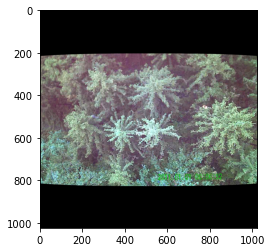

In [123]:
plt.imshow(img_0[0])

In [130]:
w = cv2.warpPerspective(img_0[0], h_cam_0[0],(img_0[0].shape[0],img_0[0].shape[1]) )

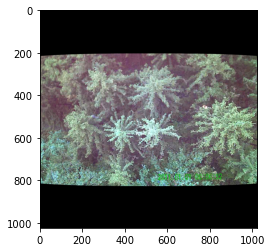

In [131]:
plt.imshow(w)

(1024, 1024, 3) (1024, 1024, 3)


error: OpenCV(4.5.3) /private/var/folders/c9/_d2ff60j58v8frzvysrf6ssm0000gn/T/pip-req-build-ad08iqlw/opencv/modules/imgproc/src/filter.simd.hpp:3110: error: (-215:Assertion failed) cn == CV_MAT_CN(dstType) && ddepth >= sdepth in function 'getLinearFilter'


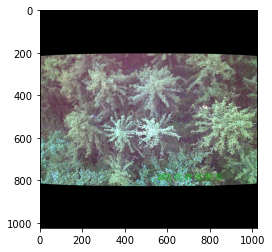

<Figure size 432x288 with 0 Axes>

In [154]:
w = None
for i,img in enumerate(img_0):
    plt.figure()
    m = cv2.warpPerspective(img_0[i]/255., h_cam_0[i],(img_0[i].shape[0],img_0[i].shape[1]) )
    center = (img_0[i].shape[0]//2, img_0[i].shape[1]//2)
    blendFlag=cv2.MIXED_CLONE
    if w is None:
        w = m.copy()
    else:
        print(m.shape, w.shape)
        
        w = cv2.seamlessClone(m, w, mask, center, blendFlag)
    plt.imshow(m)

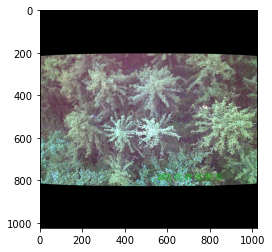

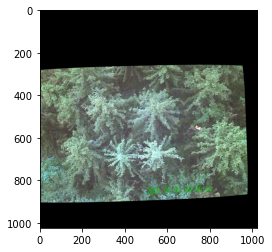

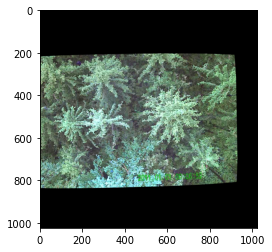

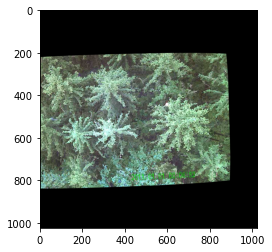

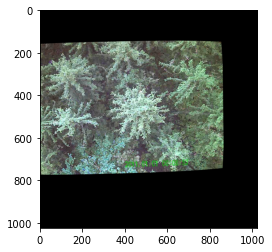

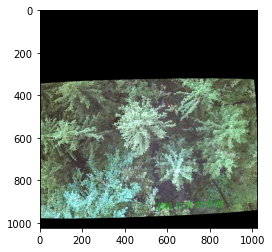

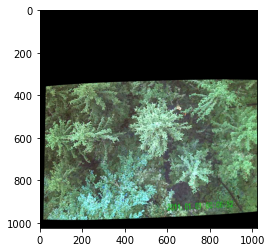

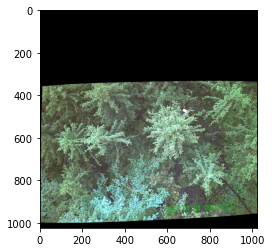

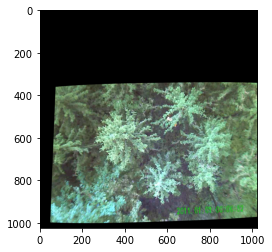

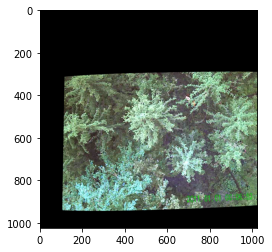

In [155]:
w = 0
for i,img in enumerate(img_0):
    plt.figure()
    m = cv2.warpPerspective(img_0[i]/255., h_cam_0[i],(img_0[i].shape[0],img_0[i].shape[1]) )
    w += 0.1 * m
    plt.imshow(m)

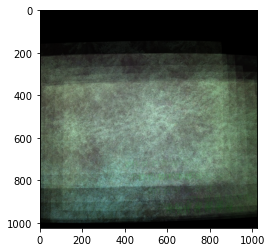

In [160]:
plt.imshow(w*1.1)